<div style="width: 100%; text-align: center; color: white; background-color: #222; font-size: 3em; font-weight: 700; padding: .5em .5em .6em .5em; line-height: 1.4em;">Weight & Balance Calculator - TG III UFABC 2022</div>

<br>

<!-- # Programação em Python para Iniciantes -->

Trabalho de graduação apresentado ao Centro de Engenharia, Modelagem e Ciências Sociais Aplicadas da Universidade Federal do ABC, como pré-requisito para obtenção do grau de Engenheira Aeroespacial.

**Título: DESENVOLVIMENTO DE SOFTWARE PARA ESTUDO DA APLICAÇÃO DO PESO E BALANCEAMENTO EM UMA AERONAVE**

**Autora**: Camila Bispo dos Santos

**Orientador**: Professor Dr. Fernando Madeira

**Coorientador**: Eng. Fabiano Galdino Moreira


Seja bem vindo(a) ao software de estudo de peso e balanceamento!



Primeiramente, este é um _notebook_: um arquivo estruturado que contém texto e código intercalados. A maneira ideal de acessar este arquivo, seja para leitura ou edição, é através do software [Jupyter](http://jupyter.org/). 

Em um _notebook_, as unidades básicas de texto ou de código são chamadas de células. É fácil distinguir as células de código: elas vem precedidas por 

    In [ ]:
    
como a célula abaixo.

Ao acessar este _notebook_ via Jupyter, você poderá executar as células de código. Para executar uma célula de código, basta selecionar a célula e digitar <kbd>SHIFT+ENTER</kbd>. Qualquer saída gerada pelo código executado será exibida logo em seguida.

Em casos de **erros** na execução do código, clicar em **`Kernel`** localizado no cabeçalho e selecionar o item <kbd>Restart & Clear Output</kbd>

## Bibliotecas Utilizadas

In [1]:
import pandas as pd
from matplotlib import pyplot
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import ttk
from tkinter import * 


## Carregamento da Base de Dados

Para executar o carregamento inicial, você precisará do arquivo em Excel **"base_dados_tg.xlsx"**. Este arquivo deve estar no **mesmo diretório** onde o código se encontra.

In [2]:
# TABELA DE CARREGAMENTO TOTAL DA AERONAVE
""" Tabela para o gráfico de batata"""
def calcula_acumulado(df, nome_coluna_balanceamento):

    nome_coluna_acumulada = f'{nome_coluna_balanceamento}_acumulado'

    if nome_coluna_balanceamento in ['massa', 'momento']:

        df[nome_coluna_acumulada] = 0.0

        for line in df.index:
            if line == 0:
                df.loc[line, nome_coluna_acumulada] = df.loc[line, nome_coluna_balanceamento]
            else:
                df.loc[line, nome_coluna_acumulada] = df.loc[line, nome_coluna_balanceamento] + df.loc[line-1, nome_coluna_acumulada]
                
    elif nome_coluna_balanceamento in ['braço', 'braco']:
        try:
            df[nome_coluna_acumulada] = df['momento_acumulado']/df['massa_acumulado']
        except:
            print('Já calculou massa e momento acumulado?')
        
    else:
        print('Nome de coluna de balanceamento não encontrado.')
        
#carrega apenas colunas usadas no cálculo
df_dianteiro = pd.read_excel("base_dados_tg.xlsx", sheet_name='dianteiro', usecols='A:D')

df_traseiro = pd.read_excel("base_dados_tg.xlsx", sheet_name='traseiro', usecols='A:D')


#carrega cg dos compartimentos de carga
df_cgcarga = pd.read_excel("base_dados_tg.xlsx", 
                             sheet_name='cg_carga',
                             usecols="A:B")

#carrega cg das fileiras
df_cgfileira = pd.read_excel("base_dados_tg.xlsx", 
                             sheet_name='cg_fileiras',
                             usecols="A:B")

#carrega a loading table
df_loadingtable = pd.read_excel("base_dados_tg.xlsx", 
                             sheet_name='loading_table',
                             usecols="A:D")

calcula_acumulado(df_dianteiro, 'massa')
calcula_acumulado(df_dianteiro, 'momento')
calcula_acumulado(df_dianteiro, 'braco')

calcula_acumulado(df_traseiro, 'massa')
calcula_acumulado(df_traseiro, 'momento')
calcula_acumulado(df_traseiro, 'braco')

df_union = pd.concat([df_dianteiro,df_traseiro])
df_union = df_union.reset_index(drop=True)

ptos_envelope = {'x': [16090,16090,16800,16800,16090,16090,16800,16800],'y':[25000,59181,59181,25000,25000,53262,53262,25000]}
df_envelope = pd.DataFrame(data=ptos_envelope)



## Funções Auxiliares

In [3]:
def calculate_all():
    #carrega a loading table
    df_loadingtable = pd.read_excel("base_dados_tg.xlsx", 
                             sheet_name='loading_table',
                             usecols="A:D")
    """PASSENGER ANALYSIS"""
    
    """ Seat Occupancy Table"""
    dflopa = pd.DataFrame(columns=['fileira','a','b','c','d','e','f'],dtype=np.int8)
    dflopa.loc[0,'fileira'] = ""
    dflopa.loc[1,'fileira'] = ""
    dflopa.loc[2,'fileira'] = ""
    dflopa.loc[3,'fileira'] = ""
    dflopa.loc[4,'fileira'] = ""
    dflopa.loc[5,'fileira'] = ""
    dflopa.loc[6,'fileira'] = ""
    dflopa.loc[7,'fileira'] = ""
    dflopa.loc[8,'fileira'] = ""
    dflopa.loc[9,'fileira'] = ""
    dflopa.loc[10,'fileira'] = ""
    dflopa.loc[11,'fileira'] = ""
    dflopa.loc[12,'fileira'] = ""
    dflopa.loc[13,'fileira'] = ""
    dflopa.loc[14,'fileira'] = ""
    dflopa.loc[15,'fileira'] = ""
    dflopa.loc[16,'fileira'] = ""
    dflopa.loc[17,'fileira'] = ""
    dflopa.loc[18,'fileira'] = ""
    dflopa.loc[19,'fileira'] = ""
    dflopa.loc[20,'fileira'] = ""
    dflopa.loc[21,'fileira'] = ""

    linha = 1
    for i in dflopa.index:
        if i >=0 and i <= 21:
            dflopa.loc[i,'fileira'] = f'Row {linha}'
            linha = linha + 1
    dflopa = dflopa.astype(object).replace(np.nan, 0)
    
    dict_passenger_entry = {
    "text_1_a" : text_1_a,
    "text_1_b" : text_1_b,
    "text_1_c" : text_1_c,
    "text_1_d" : text_1_d,
    "text_1_e" : text_1_e,
    "text_1_f" : text_1_f,
    "text_2_a" : text_2_a,
    "text_2_b" : text_2_b,
    "text_2_c" : text_2_c,
    "text_2_d" : text_2_d,
    "text_2_e" : text_2_e,
    "text_2_f" : text_2_f,
    "text_3_a" : text_3_a,
    "text_3_b" : text_3_b,
    "text_3_c" : text_3_c,
    "text_3_d" : text_3_d,
    "text_3_e" : text_3_e,
    "text_3_f" : text_3_f,
    "text_4_a" : text_4_a,
    "text_4_b" : text_4_b,
    "text_4_c" : text_4_c,
    "text_4_d" : text_4_d,
    "text_4_e" : text_4_e,
    "text_4_f" : text_4_f,
    "text_5_a" : text_5_a,
    "text_5_b" : text_5_b,
    "text_5_c" : text_5_c,
    "text_5_d" : text_5_d,
    "text_5_e" : text_5_e,
    "text_5_f" : text_5_f,
    "text_6_a" : text_6_a,
    "text_6_b" : text_6_b,
    "text_6_c" : text_6_c,
    "text_6_d" : text_6_d,
    "text_6_e" : text_6_e,
    "text_6_f" : text_6_f,
    "text_7_a" : text_7_a,
    "text_7_b" : text_7_b,
    "text_7_c" : text_7_c,
    "text_7_d" : text_7_d,
    "text_7_e" : text_7_e,
    "text_7_f" : text_7_f,
    "text_8_a" : text_8_a,
    "text_8_b" : text_8_b,
    "text_8_c" : text_8_c,
    "text_8_d" : text_8_d,
    "text_8_e" : text_8_e,
    "text_8_f" : text_8_f,
    "text_9_a" : text_9_a,
    "text_9_b" : text_9_b,
    "text_9_c" : text_9_c,
    "text_9_d" : text_9_d,
    "text_9_e" : text_9_e,
    "text_9_f" : text_9_f,
    "text_10_a" : text_10_a,
    "text_10_b" : text_10_b,
    "text_10_c" : text_10_c,
    "text_10_d" : text_10_d,
    "text_10_e" : text_10_e,
    "text_10_f" : text_10_f,
    "text_11_a" : text_11_a,
    "text_11_b" : text_11_b,
    "text_11_c" : text_11_c,
    "text_11_d" : text_11_d,
    "text_11_e" : text_11_e,
    "text_11_f" : text_11_f,
    "text_12_a" : text_12_a,
    "text_12_b" : text_12_b,
    "text_12_c" : text_12_c,
    "text_12_d" : text_12_d,
    "text_12_e" : text_12_e,
    "text_12_f" : text_12_f,
    "text_13_a" : text_13_a,
    "text_13_b" : text_13_b,
    "text_13_c" : text_13_c,
    "text_13_d" : text_13_d,
    "text_13_e" : text_13_e,
    "text_13_f" : text_13_f,
    "text_14_a" : text_14_a,
    "text_14_b" : text_14_b,
    "text_14_c" : text_14_c,
    "text_14_d" : text_14_d,
    "text_14_e" : text_14_e,
    "text_14_f" : text_14_f,
    "text_15_a" : text_15_a,
    "text_15_b" : text_15_b,
    "text_15_c" : text_15_c,
    "text_15_d" : text_15_d,
    "text_15_e" : text_15_e,
    "text_15_f" : text_15_f,
    "text_16_a" : text_16_a,
    "text_16_b" : text_16_b,
    "text_16_c" : text_16_c,
    "text_16_d" : text_16_d,
    "text_16_e" : text_16_e,
    "text_16_f" : text_16_f,
    "text_17_a" : text_17_a,
    "text_17_b" : text_17_b,
    "text_17_c" : text_17_c,
    "text_17_d" : text_17_d,
    "text_17_e" : text_17_e,
    "text_17_f" : text_17_f,
    "text_18_a" : text_18_a,
    "text_18_b" : text_18_b,
    "text_18_c" : text_18_c,
    "text_18_d" : text_18_d,
    "text_18_e" : text_18_e,
    "text_18_f" : text_18_f,
    "text_19_a" : text_19_a,
    "text_19_b" : text_19_b,
    "text_19_c" : text_19_c,
    "text_19_d" : text_19_d,
    "text_19_e" : text_19_e,
    "text_19_f" : text_19_f,
    "text_20_a" : text_20_a,
    "text_20_b" : text_20_b,
    "text_20_c" : text_20_c,
    "text_20_d" : text_20_d,
    "text_20_e" : text_20_e,
    "text_20_f" : text_20_f,
    "text_21_a" : text_21_a,
    "text_21_b" : text_21_b,
    "text_21_c" : text_21_c,
    "text_21_d" : text_21_d,
    "text_21_e" : text_21_e,
    "text_21_f" : text_21_f,
    "text_22_a" : text_22_a,
    "text_22_b" : text_22_b,
    "text_22_c" : text_22_c,
    "text_22_d" : text_22_d,
    "text_22_e" : text_22_e,
    "text_22_f" : text_22_f
    }
   
    line_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
    column_list = ['a','b','c','d','e','f']

    #lê o que foi inputado e insere na lista de passageiros
    for line in line_list:
        for column in column_list:
            variable_entry = dict_passenger_entry['text_' + str(line) + '_' + column]
            if variable_entry.get() != "":                    
#                 print(variable_entry.get())
                dflopa.loc[int(line)-1,column] = variable_entry.get()
    
    
    #soma o total de peso da fileira
    dflopa = dflopa.astype({"a":"int","b":"int","c":"int","d":"int","e":"int","f":"int"})
    dflopa['sum_of_row'] = dflopa['a']+dflopa['b']+dflopa['c']+dflopa['d']+dflopa['e']+dflopa['f']

    #insere o peso total da fileira no loading table
    df_loadingtable2 = df_loadingtable.copy()
    index = 2
    payload = 0
    moment_payload = 0
    
    for line in line_list:

        df_loadingtable2.loc[index,'Weight']=dflopa.loc[line-1,'sum_of_row']
        df_loadingtable2.loc[index,'Arm']=df_cgfileira.loc[line-1,'CG']
        df_loadingtable2.loc[index,'Moment']=(df_loadingtable2.loc[index,'Weight']) * (df_loadingtable2.loc[index,'Arm'])
        
        payload = float(df_loadingtable2.loc[index,'Weight']) + payload
        moment_payload = (df_loadingtable2.loc[index,'Moment']) + moment_payload
        index = index + 1   
    
    
    
    """CARGO ANALYSIS"""
    dict_cargo_entry = {"text_a" : text_a,
                    "text_b" : text_b,
                    "text_c" : text_c,
                    "text_d" : text_d}
    
    cargolist = ['a','b','c','d']
    
    for item in cargolist:
        cargo_entry = dict_cargo_entry['text_'+item] 
        if item == 'a':
            df_loadingtable2.loc[24,'Weight'] = float(cargo_entry.get())
            df_loadingtable2.loc[24,'Arm'] =df_cgcarga.loc [0,'CG (mm)']
            df_loadingtable2.loc[24,'Moment']= df_loadingtable2.loc[24,'Weight'] * df_loadingtable2.loc[24,'Arm']
            
            payload = (df_loadingtable2.loc[24,'Weight']) + payload
            moment_payload = (df_loadingtable2.loc[24,'Moment']) + moment_payload
        elif item == 'b':
            df_loadingtable2.loc[25,'Weight'] = float(cargo_entry.get())
            df_loadingtable2.loc[25,'Arm'] =df_cgcarga.loc [1,'CG (mm)']
            df_loadingtable2.loc[25,'Moment']= df_loadingtable2.loc[25,'Weight'] * df_loadingtable2.loc[25,'Arm']
            
            payload = (df_loadingtable2.loc[25,'Weight']) + payload
            moment_payload = (df_loadingtable2.loc[25,'Moment']) + moment_payload
        elif item == 'c':
            df_loadingtable2.loc[26,'Weight'] = float(cargo_entry.get())
            df_loadingtable2.loc[26,'Arm'] =df_cgcarga.loc[2,'CG (mm)']
            df_loadingtable2.loc[26,'Moment']= df_loadingtable2.loc[26,'Weight'] * df_loadingtable2.loc[26,'Arm']
            
            payload = (df_loadingtable2.loc[26,'Weight']) + payload
            moment_payload = (df_loadingtable2.loc[26,'Moment']) + moment_payload
        elif item == 'd':
            df_loadingtable2.loc[27,'Weight'] = float(cargo_entry.get())
            df_loadingtable2.loc[27,'Arm'] =df_cgcarga.loc [3,'CG (mm)']
            df_loadingtable2.loc[27,'Moment']= df_loadingtable2.loc[27,'Weight'] * df_loadingtable2.loc[27,'Arm']
            
            payload = (df_loadingtable2.loc[27,'Weight']) + payload
            moment_payload = (df_loadingtable2.loc[27,'Moment']) + moment_payload
    
    """FUEL ANALYSIS"""
    dfuel = 0.775 #kg/L
    #inserir a curva aqui
    
    if text_kilo.get() != 0:
        df_loadingtable2.loc[1,"Weight"]=float(text_kilo.get())
        resultarm = ((-2*(10**(-6)*(float(text_kilo.get()))**2) + (0.0826*(float(text_kilo.get()))) + 15631))
        df_loadingtable2.loc[1,"Arm"]= resultarm
        df_loadingtable2.loc[1,'Moment']= df_loadingtable2.loc[1,'Weight'] * df_loadingtable2.loc[1,'Arm']

#     elif text_volume.get() != 0:
#         df_loadingtable2.loc[1,"Weight"]=float(text_volume.get()*dfuel)
#         df_loadingtable2.loc[1,"Arm"]= (-2*(10**(-6)*(float(text_volume.get()))**2) + (0.0826*(float(text_volume.get()))) + 15631)
#         df_loadingtable2.loc[1,'Moment']= df_loadingtable2.loc[1,'Weight'] * df_loadingtable2.loc[1,'Arm']

    if text_kilo_ramp.get() != 0:
        FUEL_RAMP_WEIGHT = float(text_kilo_ramp.get())
        FUEL_RAMP_ARM = (-2*(10**(-6))*(float(text_kilo_ramp.get()))**2) + (0.0826*(float(text_kilo_ramp.get()))) + 15631
        FUEL_RAMP_MOMENT = FUEL_RAMP_WEIGHT * FUEL_RAMP_ARM
#     elif text_volume_ramp.get() != 0 :
#         FUEL_RAMP_WEIGHT = float(text_volume_ramp.get()*dfuel)
#         FUEL_RAMP_ARM = (-2*(10**(-6))*(float(text_volume_ramp.get()))**2) + (0.0826*(float(text_volume_ramp.get()))) + 15631
#         FUEL_RAMP_MOMENT = FUEL_RAMP_WEIGHT * FUEL_RAMP_ARM
        
    if text_kilo_trip.get() != 0:
        TRIP_FUEL_WEIGHT = float(text_kilo_trip.get())
        TRIP_FUEL_ARM = (-2*(10**(-6))*(float(text_kilo_trip.get()))**2) + (0.0826*(float(text_kilo_trip.get()))) + 15631
        TRIP_FUEL_MOMENT = TRIP_FUEL_WEIGHT * TRIP_FUEL_ARM
#     elif text_volume_trip.get() != 0:
#         TRIP_FUEL_WEIGHT = float(text_volume_trip.get()*dfuel)
#         TRIP_FUEL_ARM = (-2*(10**(-6))*(float(text_volume_trip.get()))**2) + (0.0826*(float(text_volume_trip.get()))) + 15631
#         TRIP_FUEL_MOMENT = TRIP_FUEL_WEIGHT * TRIP_FUEL_ARM
        
    """BOW ARM AND WEIGHT"""
    df_loadingtable2.loc[0,'Weight']=df_union.loc[0,'massa']
    df_loadingtable2.loc[0,'Arm']=df_union.loc[0,'braço']  
    df_loadingtable2.loc[0,'Moment']= df_loadingtable2.loc[0,'Weight'] * df_loadingtable2.loc[0,'Arm']
    
    """EXTRACT OF WEIGHTS"""
    BOW_WEIGHT = df_loadingtable2.loc[0,'Weight']    
    BOW_MOMENT = df_loadingtable2.loc[0,'Moment']
    BOW_ARM = df_loadingtable2.loc[0,'Arm']
    
    labelbowarm.config(text=round(BOW_ARM,2))
    labelbowweight.config(text=round(BOW_WEIGHT,2))
    labelbowmoment.config(text=round(BOW_MOMENT,2))
    
    PAYLOAD_WEIGHT = payload
    PAYLOAD_MOMENT = moment_payload
    
    labelpayloadweight.config(text=round(PAYLOAD_WEIGHT,2))
    labelpayloadmoment.config(text=round(PAYLOAD_MOMENT,2))
        
    ZFW = BOW_WEIGHT + PAYLOAD_WEIGHT
    ZFW_MOMENT = BOW_MOMENT + PAYLOAD_MOMENT
    ZFW_ARM = ZFW_MOMENT / ZFW
    
    labelzfwweight.config(text=round(ZFW,2))
    labelzfwarm.config(text=round(ZFW_ARM,2))
    labelzfwmoment.config(text=round(ZFW_MOMENT,2))
    
    
    FUEL_WEIGHT = df_loadingtable2.loc[1,"Weight"]
    FUEL_ARM = df_loadingtable2.loc[1,"Arm"]
    FUEL_MOMENT = FUEL_WEIGHT * FUEL_ARM
    
    labeltoffuelweight.config(text=round(FUEL_WEIGHT,2))
    labeltoffuelarm.config(text=round(FUEL_ARM,2))
    labeltoffuelmoment.config(text=round(FUEL_MOMENT,2))
    
    RAMP_WEIGHT = ZFW + FUEL_WEIGHT
    RAMP_MOMENT = ZFW_MOMENT + FUEL_MOMENT
    RAMP_ARM = RAMP_MOMENT / RAMP_WEIGHT
    
    labelrampweight.config(text=round(RAMP_WEIGHT,2))
    labelramparm.config(text=round(RAMP_ARM,2))
    labelrampmoment.config(text=round(RAMP_MOMENT,2))

    
    TOFF_WEIGHT = RAMP_WEIGHT - FUEL_RAMP_WEIGHT
    TOFF_MOMENT = RAMP_MOMENT - FUEL_RAMP_MOMENT
    TOFF_ARM = TOFF_MOMENT / TOFF_WEIGHT
    
    labeltoffweight.config(text=round(TOFF_WEIGHT,2))
    labeltoffarm.config(text=round(TOFF_ARM,2))
    labeltoffmoment.config(text=round(TOFF_MOMENT,2))
    
    labeltripweight.config(text=round(TRIP_FUEL_WEIGHT,2))
    labeltriparm.config(text=round(TRIP_FUEL_ARM,2))
    labeltripmoment.config(text=round(TRIP_FUEL_MOMENT,2))
    
    LDG_WEIGHT = TOFF_WEIGHT - TRIP_FUEL_WEIGHT
    LDG_MOMENT = TOFF_MOMENT - TRIP_FUEL_MOMENT
    LDG_ARM = LDG_MOMENT / LDG_WEIGHT
    
    labelldgweight.config(text=round(LDG_WEIGHT,2))
    labelldgarm.config(text=round(LDG_ARM,2))
    labelldgmoment.config(text=round(LDG_MOMENT,2))

    
    plot1 = batata.add_subplot(111).scatter(ZFW_ARM,ZFW,color='#17a589',label='ZFW')
    plot2 = batata.add_subplot(111).scatter(TOFF_ARM,TOFF_WEIGHT,color='red',label='TOFF')
    plot3 = batata.add_subplot(111).scatter(LDG_ARM,LDG_WEIGHT,label='LDG')
    plt.legend(loc=1)
    canvas.get_tk_widget().place(height=500, width=490)
    canvas.draw()

    
    

<div style="width: 100%; text-align: center; color: white; background-color: #555; font-size: 2.2em; font-weight: 700; padding: .5em .5em .6em .5em; line-height: 1em;">Execução da Interface do Software</div>

<br>


Ao executar o código abaixo, você deverá ter a visualização da interface da calculadora de peso e balanceamento. Dentro dela, é possível inserir os pesos de passageiros dentro da aeronave de estudo, inserir cargas nos porões de carga e também adicionar o combustível que será utilizado em um voo simulado.

Para maiores explicações, consultar a parte escrita do trabalho de graduação. 

**ATENÇÃO: NÃO UTILIZAR OS DADOS DESTE SOFTWARE PARA USO EM UM VOO REAL! ESTA É APENAS UMA AERONAVE DE ESTUDO.**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:348: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:349: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:350: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a 

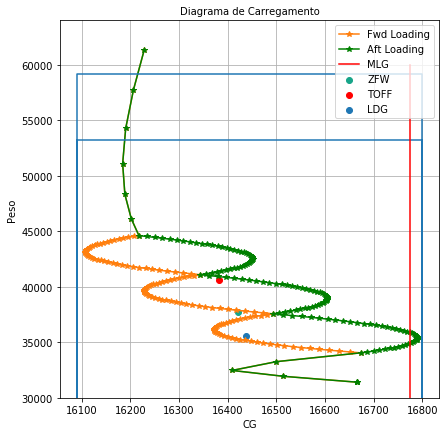

In [9]:
"""Tela Inicial"""
main = tk.Tk()
main.title("Weight & Balance Calculator (UFABC 2022 - Undergraduate Thesis)")
main.geometry("980x850")
main.pack_propagate(False)
main.resizable(0,0)
global labelbowweight
global plotzfw
global plottoff
global plotldg
global canvas

# abas
tab_control = ttk.Notebook(main) 
aba1 = ttk.Frame(tab_control)
aba1.place(x = 0, y=20, height = 50, width = 50)


tab_control.add(aba1, text='Home') 
tab_control.pack(expand=1, fill='both') 

#frame for pandastable
frame_pax = tk.LabelFrame(aba1, text="Passengers")
frame_pax.place(x=20, y=30, height=220, width=930)

# creating labels for passengers
label1 = Label(frame_pax,text="1")
label2 = Label(frame_pax,text="2")
label3 = Label(frame_pax,text = "3")
label4 = Label(frame_pax,text = "4")
label5 = Label(frame_pax,text = "5")
label6 = Label(frame_pax,text = "6")
label7 = Label(frame_pax,text = "7")
label8 = Label(frame_pax,text = "8")
label9 = Label(frame_pax,text = "9")
label10 = Label(frame_pax,text = "10")
label11 = Label(frame_pax,text = "11")
label12 = Label(frame_pax,text = "12")
label13 = Label(frame_pax,text = "13")
label14 = Label(frame_pax,text = "14")
label15 = Label(frame_pax,text = "15")
label16 = Label(frame_pax,text = "16")
label17 = Label(frame_pax,text = "17")
label18 = Label(frame_pax,text = "18")
label19 = Label(frame_pax,text = "19")
label20 = Label(frame_pax,text = "20")
label21 = Label(frame_pax,text = "21")
label22 = Label(frame_pax,text = "22")
label1f = Label(frame_pax,text="F")
label1e = Label(frame_pax,text="E")
labelspace1 = Label(frame_pax,text="")
label1d = Label(frame_pax,text="D")
label1c = Label(frame_pax,text="C")
labelspace2 = Label(frame_pax,text="")
label1b = Label(frame_pax,text="B")
label1a = Label(frame_pax,text="A")

# placing entries for passengers
label1.place(x=35,y=0)
label2.place(x=75,y=0)
label3.place(x=115,y=0)
label4.place(x=155 ,y=0)
label5.place(x=195 ,y=0)
label6.place(x=235 ,y=0)
label7.place(x=275 ,y=0)
label8.place(x=315 ,y=0)
label9.place(x=355 ,y=0)
label10.place(x=395 ,y=0)
label11.place(x=435 ,y=0)
label12.place(x=475 ,y=0)
label13.place(x=515 ,y=0)
label14.place(x=555 ,y=0)
label15.place(x=595 ,y=0)
label16.place(x=635 ,y=0)
label17.place(x=675 ,y=0)
label18.place(x=715 ,y=0)
label19.place(x=755 ,y=0)
label20.place(x=795 ,y=0)
label21.place(x=835 ,y=0)
label22.place(x=875 ,y=0)
label1f.place(x=10,y=20)
label1e.place(x=10,y=40)
labelspace1.place(x=10,y=60)
label1d.place(x=10,y=80)
label1c.place(x=10,y=100)
labelspace2.place(x=10,y=120)
label1b.place(x=10,y=140)
label1a.place(x=10,y=160)

# create a text box
text_1_f = Entry(frame_pax, width = 4)
text_1_e = Entry(frame_pax, width = 4)
text_1_d = Entry(frame_pax, width = 4)
text_1_c = Entry(frame_pax, width = 4)
text_1_b = Entry(frame_pax, width = 4)
text_1_a = Entry(frame_pax, width = 4)
text_2_f = Entry(frame_pax, width = 4)
text_2_e = Entry(frame_pax, width = 4)
text_2_d = Entry(frame_pax, width = 4)
text_2_c = Entry(frame_pax, width = 4)
text_2_b = Entry(frame_pax, width = 4)
text_2_a = Entry(frame_pax, width = 4)
text_3_f = Entry(frame_pax, width = 4)
text_3_e = Entry(frame_pax, width = 4)
text_3_d = Entry(frame_pax, width = 4)
text_3_c = Entry(frame_pax, width = 4)
text_3_b = Entry(frame_pax, width = 4)
text_3_a = Entry(frame_pax, width = 4)
text_4_a = Entry(frame_pax, width = 4)
text_4_b = Entry(frame_pax, width = 4)
text_4_c = Entry(frame_pax, width = 4)
text_4_d = Entry(frame_pax, width = 4)
text_4_e = Entry(frame_pax, width = 4)
text_4_f = Entry(frame_pax, width = 4)
text_5_a = Entry(frame_pax, width = 4)
text_5_b = Entry(frame_pax, width = 4)
text_5_c = Entry(frame_pax, width = 4)
text_5_d = Entry(frame_pax, width = 4)
text_5_e = Entry(frame_pax, width = 4)
text_5_f = Entry(frame_pax, width = 4)
text_6_a = Entry(frame_pax, width = 4)
text_6_b = Entry(frame_pax, width = 4)
text_6_c = Entry(frame_pax, width = 4)
text_6_d = Entry(frame_pax, width = 4)
text_6_e = Entry(frame_pax, width = 4)
text_6_f = Entry(frame_pax, width = 4)
text_7_a = Entry(frame_pax, width = 4)
text_7_b = Entry(frame_pax, width = 4)
text_7_c = Entry(frame_pax, width = 4)
text_7_d = Entry(frame_pax, width = 4)
text_7_e = Entry(frame_pax, width = 4)
text_7_f = Entry(frame_pax, width = 4)
text_8_a = Entry(frame_pax, width = 4)
text_8_b = Entry(frame_pax, width = 4)
text_8_c = Entry(frame_pax, width = 4)
text_8_d = Entry(frame_pax, width = 4)
text_8_e = Entry(frame_pax, width = 4)
text_8_f = Entry(frame_pax, width = 4)
text_9_a = Entry(frame_pax, width = 4)
text_9_b = Entry(frame_pax, width = 4)
text_9_c = Entry(frame_pax, width = 4)
text_9_d = Entry(frame_pax, width = 4)
text_9_e = Entry(frame_pax, width = 4)
text_9_f = Entry(frame_pax, width = 4)
text_10_a = Entry(frame_pax, width = 4)
text_10_b = Entry(frame_pax, width = 4)
text_10_c = Entry(frame_pax, width = 4)
text_10_d = Entry(frame_pax, width = 4)
text_10_e = Entry(frame_pax, width = 4)
text_10_f = Entry(frame_pax, width = 4)
text_11_a = Entry(frame_pax, width = 4)
text_11_b = Entry(frame_pax, width = 4)
text_11_c = Entry(frame_pax, width = 4)
text_11_d = Entry(frame_pax, width = 4)
text_11_e = Entry(frame_pax, width = 4)
text_11_f = Entry(frame_pax, width = 4)
text_12_a = Entry(frame_pax, width = 4)
text_12_b = Entry(frame_pax, width = 4)
text_12_c = Entry(frame_pax, width = 4)
text_12_d = Entry(frame_pax, width = 4)
text_12_e = Entry(frame_pax, width = 4)
text_12_f = Entry(frame_pax, width = 4)
text_13_a = Entry(frame_pax, width = 4)
text_13_b = Entry(frame_pax, width = 4)
text_13_c = Entry(frame_pax, width = 4)
text_13_d = Entry(frame_pax, width = 4)
text_13_e = Entry(frame_pax, width = 4)
text_13_f = Entry(frame_pax, width = 4)
text_14_a = Entry(frame_pax, width = 4)
text_14_b = Entry(frame_pax, width = 4)
text_14_c = Entry(frame_pax, width = 4)
text_14_d = Entry(frame_pax, width = 4)
text_14_e = Entry(frame_pax, width = 4)
text_14_f = Entry(frame_pax, width = 4)
text_15_a = Entry(frame_pax, width = 4)
text_15_b = Entry(frame_pax, width = 4)
text_15_c = Entry(frame_pax, width = 4)
text_15_d = Entry(frame_pax, width = 4)
text_15_e = Entry(frame_pax, width = 4)
text_15_f = Entry(frame_pax, width = 4)
text_16_a = Entry(frame_pax, width = 4)
text_16_b = Entry(frame_pax, width = 4)
text_16_c = Entry(frame_pax, width = 4)
text_16_d = Entry(frame_pax, width = 4)
text_16_e = Entry(frame_pax, width = 4)
text_16_f = Entry(frame_pax, width = 4)
text_17_a = Entry(frame_pax, width = 4)
text_17_b = Entry(frame_pax, width = 4)
text_17_c = Entry(frame_pax, width = 4)
text_17_d = Entry(frame_pax, width = 4)
text_17_e = Entry(frame_pax, width = 4)
text_17_f = Entry(frame_pax, width = 4)
text_18_a = Entry(frame_pax, width = 4)
text_18_b = Entry(frame_pax, width = 4)
text_18_c = Entry(frame_pax, width = 4)
text_18_d = Entry(frame_pax, width = 4)
text_18_e = Entry(frame_pax, width = 4)
text_18_f = Entry(frame_pax, width = 4)
text_19_a = Entry(frame_pax, width = 4)
text_19_b = Entry(frame_pax, width = 4)
text_19_c = Entry(frame_pax, width = 4)
text_19_d = Entry(frame_pax, width = 4)
text_19_e = Entry(frame_pax, width = 4)
text_19_f = Entry(frame_pax, width = 4)
text_20_a = Entry(frame_pax, width = 4)
text_20_b = Entry(frame_pax, width = 4)
text_20_c = Entry(frame_pax, width = 4)
text_20_d = Entry(frame_pax, width = 4)
text_20_e = Entry(frame_pax, width = 4)
text_20_f = Entry(frame_pax, width = 4)
text_21_a = Entry(frame_pax, width = 4)
text_21_b = Entry(frame_pax, width = 4)
text_21_c = Entry(frame_pax, width = 4)
text_21_d = Entry(frame_pax, width = 4)
text_21_e = Entry(frame_pax, width = 4)
text_21_f = Entry(frame_pax, width = 4)
text_22_a = Entry(frame_pax, width = 4)
text_22_b = Entry(frame_pax, width = 4)
text_22_c = Entry(frame_pax, width = 4)
text_22_d = Entry(frame_pax, width = 4)
text_22_e = Entry(frame_pax, width = 4)
text_22_f = Entry(frame_pax, width = 4)


# insert the text box
text_1_f.insert(INSERT, 0)
text_1_e.insert(INSERT, 0)
text_1_d.insert(INSERT, 0)
text_1_c.insert(INSERT, 0)
text_1_b.insert(INSERT, 0)
text_1_a.insert(INSERT, 0)
text_2_f.insert(INSERT, 0)
text_2_e.insert(INSERT, 0)
text_2_d.insert(INSERT, 0)
text_2_c.insert(INSERT, 0)
text_2_b.insert(INSERT, 0)
text_2_a.insert(INSERT, 0)
text_3_f.insert(INSERT, 0)
text_3_e.insert(INSERT, 0)
text_3_d.insert(INSERT, 0)
text_3_c.insert(INSERT, 0)
text_3_b.insert(INSERT, 0)
text_3_a.insert(INSERT, 0)
text_4_a.insert(INSERT, 0)
text_4_b.insert(INSERT, 0)
text_4_c.insert(INSERT, 0)
text_4_d.insert(INSERT, 0)
text_4_e.insert(INSERT, 0)
text_4_f.insert(INSERT, 0)
text_5_a.insert(INSERT, 0)
text_5_b.insert(INSERT, 0)
text_5_c.insert(INSERT, 0)
text_5_d.insert(INSERT, 0)
text_5_e.insert(INSERT, 0)
text_5_f.insert(INSERT, 0)
text_6_a.insert(INSERT, 0)
text_6_b.insert(INSERT, 0)
text_6_c.insert(INSERT, 0)
text_6_d.insert(INSERT, 0)
text_6_e.insert(INSERT, 0)
text_6_f.insert(INSERT, 0)
text_7_a.insert(INSERT, 0)
text_7_b.insert(INSERT, 0)
text_7_c.insert(INSERT, 0)
text_7_d.insert(INSERT, 0)
text_7_e.insert(INSERT, 0)
text_7_f.insert(INSERT, 0)
text_8_a.insert(INSERT, 0)
text_8_b.insert(INSERT, 0)
text_8_c.insert(INSERT, 0)
text_8_d.insert(INSERT, 0)
text_8_e.insert(INSERT, 0)
text_8_f.insert(INSERT, 0)
text_9_a.insert(INSERT, 0)
text_9_b.insert(INSERT, 0)
text_9_c.insert(INSERT, 0)
text_9_d.insert(INSERT, 0)
text_9_e.insert(INSERT, 0)
text_9_f.insert(INSERT, 0)
text_10_a.insert(INSERT, 0)
text_10_b.insert(INSERT, 0)
text_10_c.insert(INSERT, 0)
text_10_d.insert(INSERT, 0)
text_10_e.insert(INSERT, 0)
text_10_f.insert(INSERT, 0)
text_11_a.insert(INSERT, 0)
text_11_b.insert(INSERT, 0)
text_11_c.insert(INSERT, 0)
text_11_d.insert(INSERT, 0)
text_11_e.insert(INSERT, 0)
text_11_f.insert(INSERT, 0)
text_12_a.insert(INSERT, 0)
text_12_b.insert(INSERT, 0)
text_12_c.insert(INSERT, 0)
text_12_d.insert(INSERT, 0)
text_12_e.insert(INSERT, 0)
text_12_f.insert(INSERT, 0)
text_13_a.insert(INSERT, 0)
text_13_b.insert(INSERT, 0)
text_13_c.insert(INSERT, 0)
text_13_d.insert(INSERT, 0)
text_13_e.insert(INSERT, 0)
text_13_f.insert(INSERT, 0)
text_14_a.insert(INSERT, 0)
text_14_b.insert(INSERT, 0)
text_14_c.insert(INSERT, 0)
text_14_d.insert(INSERT, 0)
text_14_e.insert(INSERT, 0)
text_14_f.insert(INSERT, 0)
text_15_a.insert(INSERT, 0)
text_15_b.insert(INSERT, 0)
text_15_c.insert(INSERT, 0)
text_15_d.insert(INSERT, 0)
text_15_e.insert(INSERT, 0)
text_15_f.insert(INSERT, 0)
text_16_a.insert(INSERT, 0)
text_16_b.insert(INSERT, 0)
text_16_c.insert(INSERT, 0)
text_16_d.insert(INSERT, 0)
text_16_e.insert(INSERT, 0)
text_16_f.insert(INSERT, 0)
text_17_a.insert(INSERT, 0)
text_17_b.insert(INSERT, 0)
text_17_c.insert(INSERT, 0)
text_17_d.insert(INSERT, 0)
text_17_e.insert(INSERT, 0)
text_17_f.insert(INSERT, 0)
text_18_a.insert(INSERT, 0)
text_18_b.insert(INSERT, 0)
text_18_c.insert(INSERT, 0)
text_18_d.insert(INSERT, 0)
text_18_e.insert(INSERT, 0)
text_18_f.insert(INSERT, 0)
text_19_a.insert(INSERT, 0)
text_19_b.insert(INSERT, 0)
text_19_c.insert(INSERT, 0)
text_19_d.insert(INSERT, 0)
text_19_e.insert(INSERT, 0)
text_19_f.insert(INSERT, 0)
text_20_a.insert(INSERT, 0)
text_20_b.insert(INSERT, 0)
text_20_c.insert(INSERT, 0)
text_20_d.insert(INSERT, 0)
text_20_e.insert(INSERT, 0)
text_20_f.insert(INSERT, 0)
text_21_a.insert(INSERT, 0)
text_21_b.insert(INSERT, 0)
text_21_c.insert(INSERT, 0)
text_21_d.insert(INSERT, 0)
text_21_e.insert(INSERT, 0)
text_21_f.insert(INSERT, 0)
text_22_a.insert(INSERT, 0)
text_22_b.insert(INSERT, 0)
text_22_c.insert(INSERT, 0)
text_22_d.insert(INSERT, 0)
text_22_e.insert(INSERT, 0)
text_22_f.insert(INSERT, 0)


# specify location of entries
text_1_f.place(x=30, y=20)
text_1_e.place(x=30, y=40)
text_1_d.place(x=30, y=80)
text_1_c.place(x=30, y=100)
text_1_b.place(x=30, y=140)
text_1_a.place(x=30, y=160)
text_2_f.place(x=70, y=20)
text_2_e.place(x=70, y=40)
text_2_d.place(x=70, y=80)
text_2_c.place(x=70, y=100)
text_2_b.place(x=70, y=140)
text_2_a.place(x=70, y=160)
text_3_f.place(x=110, y=20)
text_3_e.place(x=110, y=40)
text_3_d.place(x=110, y=80)
text_3_c.place(x=110, y=100)
text_3_b.place(x=110, y=140)
text_3_a.place(x=110, y=160)
text_4_a.place(x=150 ,y = 20)
text_4_b.place(x=150 ,y =40 )
text_4_c.place(x=150 ,y =80 )
text_4_d.place(x=150 ,y =100 )
text_4_e.place(x=150 ,y =140 )
text_4_f.place(x=150 ,y =160 )
text_5_a.place(x=190 ,y =20 )
text_5_b.place(x=190 ,y =40 )
text_5_c.place(x=190 ,y =80 )
text_5_d.place(x=190 ,y =100 )
text_5_e.place(x=190 ,y =140 )
text_5_f.place(x=190 ,y =160 )
text_6_a.place(x=230 ,y =20 )
text_6_b.place(x=230 ,y =40 )
text_6_c.place(x=230 ,y =80 )
text_6_d.place(x=230 ,y =100 )
text_6_e.place(x=230 ,y =140 )
text_6_f.place(x=230 ,y =160 )
text_7_a.place(x=270 ,y =20 )
text_7_b.place(x=270 ,y =40 )
text_7_c.place(x=270 ,y =80 )
text_7_d.place(x=270 ,y =100 )
text_7_e.place(x=270 ,y =140 )
text_7_f.place(x=270 ,y =160 )
text_8_a.place(x=310 ,y =20 )
text_8_b.place(x=310 ,y =40 )
text_8_c.place(x=310 ,y =80 )
text_8_d.place(x=310 ,y =100 )
text_8_e.place(x=310 ,y =140 )
text_8_f.place(x=310 ,y =160 )
text_9_a.place(x=350 ,y =20 )
text_9_b.place(x=350 ,y =40 )
text_9_c.place(x=350 ,y =80 )
text_9_d.place(x=350 ,y =100 )
text_9_e.place(x=350 ,y =140 )
text_9_f.place(x=350 ,y =160 )
text_10_a.place(x=390 ,y =20 )
text_10_b.place(x=390 ,y =40)
text_10_c.place(x=390 ,y =80 )
text_10_d.place(x=390 ,y =100 )
text_10_e.place(x=390 ,y =140 )
text_10_f.place(x=390 ,y =160 )
text_11_a.place(x=430 ,y =20 )
text_11_b.place(x=430 ,y =40 )
text_11_c.place(x=430 ,y =80 )
text_11_d.place(x=430 ,y =100 )
text_11_e.place(x=430 ,y =140 )
text_11_f.place(x=430 ,y =160 )
text_12_a.place(x=470 ,y =20 )
text_12_b.place(x=470 ,y =40 )
text_12_c.place(x=470 ,y =80 )
text_12_d.place(x=470 ,y =100 )
text_12_e.place(x=470 ,y =140 )
text_12_f.place(x=470 ,y =160 )
text_13_a.place(x=510 ,y =20 )
text_13_b.place(x=510 ,y =40 )
text_13_c.place(x=510 ,y =80 )
text_13_d.place(x=510 ,y =100 )
text_13_e.place(x=510 ,y =140 )
text_13_f.place(x=510 ,y =160 )
text_14_a.place(x=550 ,y =20 )
text_14_b.place(x=550 ,y =40 )
text_14_c.place(x=550 ,y =80 )
text_14_d.place(x=550 ,y =100 )
text_14_e.place(x=550 ,y =140 )
text_14_f.place(x=550 ,y =160 )
text_15_a.place(x=590 ,y =20 )
text_15_b.place(x=590 ,y =40 )
text_15_c.place(x=590 ,y =80 )
text_15_d.place(x=590 ,y =100 )
text_15_e.place(x=590 ,y =140 )
text_15_f.place(x=590 ,y =160 )
text_16_a.place(x=630 ,y =20 )
text_16_b.place(x=630 ,y =40 )
text_16_c.place(x=630 ,y =80 )
text_16_d.place(x=630 ,y =100 )
text_16_e.place(x=630 ,y =140 )
text_16_f.place(x=630 ,y =160 )
text_17_a.place(x=670 ,y =20 )
text_17_b.place(x=670 ,y =40 )
text_17_c.place(x=670 ,y =80 )
text_17_d.place(x=670 ,y =100 )
text_17_e.place(x=670 ,y =140 )
text_17_f.place(x=670 ,y =160 )
text_18_a.place(x=710 ,y =20 )
text_18_b.place(x=710 ,y =40 )
text_18_c.place(x=710 ,y =80 )
text_18_d.place(x=710 ,y =100 )
text_18_e.place(x=710 ,y =140 )
text_18_f.place(x=710 ,y =160 )
text_19_a.place(x=750 ,y =20 )
text_19_b.place(x=750 ,y =40 )
text_19_c.place(x=750 ,y =80 )
text_19_d.place(x=750 ,y =100 )
text_19_e.place(x=750 ,y =140 )
text_19_f.place(x=750 ,y =160 )
text_20_a.place(x=790 ,y = 20)
text_20_b.place(x=790 ,y =40 )
text_20_c.place(x=790 ,y =80 )
text_20_d.place(x=790 ,y =100 )
text_20_e.place(x=790 ,y =140 )
text_20_f.place(x=790 ,y =160 )
text_21_a.place(x=830 ,y =20 )
text_21_b.place(x=830 ,y =40 )
text_21_c.place(x=830 ,y =80 )
text_21_d.place(x=830 ,y =100 )
text_21_e.place(x=830 ,y =140 )
text_21_f.place(x=830 ,y =160 )
text_22_a.place(x=870 ,y =20 )
text_22_b.place(x=870 ,y =40 )
text_22_c.place(x=870 ,y =80 )
text_22_d.place(x=870 ,y =100 )
text_22_e.place(x=870 ,y =140 )
text_22_f.place(x=870 ,y =160 )


#frame for porão
frame_porao = tk.LabelFrame(aba1, text="Cargo Compartments")
frame_porao.place(x=20, y=480, height=80, width=435)

# label for cargo compartments
labela = Label(frame_porao,text="A")
labelb = Label(frame_porao,text="B")
labelc = Label(frame_porao,text="C")
labeld = Label(frame_porao,text="D")

# placing labels for cargo
labela.place(x=45,y=0)
labelb.place(x=145,y=0)
labelc.place(x=245,y=0)
labeld.place(x=345,y=0)

# create an entry
text_a = Entry(frame_porao, width = 10)
text_b = Entry(frame_porao, width = 10)
text_c = Entry(frame_porao, width = 10)
text_d = Entry(frame_porao, width = 10)

# insert the entry
text_a.insert(INSERT, 0)
text_b.insert(INSERT, 0)
text_c.insert(INSERT, 0)
text_d.insert(INSERT, 0)

# specify location of entries
text_a.place(x=20, y=20)
text_b.place(x=120, y=20)
text_c.place(x=220, y=20)
text_d.place(x=320, y=20)


#frame for fuel
frame_fuel = tk.LabelFrame(aba1, text="Fuel")
frame_fuel.place(x=20, y=280, height=200, width=435)

# label for fuel
labelkilo = Label(frame_fuel,text="TakeOff (kg)")
# labelvolume= Label(frame_fuel,text="TakeOff (L)")

labelkilo_ramp = Label(frame_fuel,text = "Taxi (kg)")
# labelvolume_ramp = Label(frame_fuel,text = "Taxi (L)")

labelkilo_trip = Label(frame_fuel,text = "Trip (kg)")
# labelvolume_trip = Label(frame_fuel,text = "Trip (L)")


# placing labels for fuel
labelkilo.place(x=100,y=0)
# labelvolume.place(x=250,y=0)
labelkilo_ramp.place(x=100,y=50)
# labelvolume_ramp.place(x=250,y=50)
labelkilo_trip.place(x=100,y=100)
# labelvolume_trip.place(x=250,y=100)

# create an entry
text_kilo = Entry(frame_fuel, width = 40)
# text_volume = Entry(frame_fuel, width = 20)
text_kilo_ramp = Entry(frame_fuel, width = 40)
# text_volume_ramp = Entry(frame_fuel, width = 20)
text_kilo_trip = Entry(frame_fuel, width = 40)
# text_volume_trip = Entry(frame_fuel, width = 20)

# insert the entry
text_kilo.insert(INSERT, 0)
# text_volume.insert(INSERT, 0)
text_kilo_ramp.insert(INSERT, 0)
# text_volume_ramp.insert(INSERT, 0)
text_kilo_trip.insert(INSERT, 0)
# text_volume_trip.insert(INSERT, 0)

# specify location of entries
text_kilo.place(x=90, y=20)
# text_volume.place(x=240, y=20)
text_kilo_ramp.place(x=90, y=70)
# text_volume_ramp.place(x=240, y=70)
text_kilo_trip.place(x=90, y=120)
# text_volume_trip.place(x=240, y=120)

# frame for pesos com cgs resultantes
frame_pesos = tk.LabelFrame(aba1,text="Location")
frame_pesos.place(x=20, y= 560, height = 220, width = 435)

#label for extracts
labelitem = Label(frame_pesos,text="Item")
labelweight = Label(frame_pesos,text="Weight (kg)")
labelarm = Label(frame_pesos,text="Arm(mm)")
labelmoment = Label(frame_pesos,text="Moment(kg.mm)")
labelbow = Label(frame_pesos,text="BOW")
labelpayload = Label(frame_pesos,text="Payload")
labelzfw = Label(frame_pesos,text="Zero Fuel Weight")
labeltofffuel = Label(frame_pesos,text="Take Off Fuel")
labelramp = Label(frame_pesos,text="Ramp Weight")
labeltoff = Label(frame_pesos,text="Take Off Weight")
labeltrip = Label(frame_pesos,text="Trip Fuel")
labelldg = Label(frame_pesos,text="Landing Weight")

labelbowweight = Label(frame_pesos,text="")
labelbowarm = Label(frame_pesos,text="")
labelbowmoment = Label(frame_pesos,text = "")
labelpayloadweight= Label(frame_pesos,text = "")
labelpayloadarm= Label(frame_pesos,text = "")
labelpayloadmoment= Label(frame_pesos,text = "")
labelzfwweight= Label(frame_pesos,text = "")
labelzfwarm= Label(frame_pesos,text = "")
labelzfwmoment= Label(frame_pesos,text = "")
labeltoffuelweight= Label(frame_pesos,text = "")
labeltoffuelarm= Label(frame_pesos,text = "")
labeltoffuelmoment= Label(frame_pesos,text = "")
labelrampweight= Label(frame_pesos,text = "")
labelramparm= Label(frame_pesos,text = "")
labelrampmoment= Label(frame_pesos,text = "")
labeltoffweight= Label(frame_pesos,text = "")
labeltoffarm= Label(frame_pesos,text = "")
labeltoffmoment= Label(frame_pesos,text = "")
labeltripweight= Label(frame_pesos,text = "")
labeltriparm= Label(frame_pesos,text = "")
labeltripmoment= Label(frame_pesos,text = "")
labelldgweight=Label(frame_pesos,text = "")
labelldgarm=Label(frame_pesos,text = "")
labelldgmoment=Label(frame_pesos,text = "")

# placing labels
labelitem.place(x=5,y=0)
labelweight.place(x=120,y=0)
labelarm.place(x=220,y=0)
labelmoment.place(x=320,y=0)
labelbow.place(x=5,y=30)
labelpayload.place(x=5,y=50)
labelzfw.place(x=5,y=70)
labeltofffuel.place(x=5,y=90)
labelramp.place(x=5,y=110)
labeltoff.place(x=5,y=130)
labeltrip.place(x=5,y=150)
labelldg.place(x=5,y=170)
labelbowweight.place(x=120,y=30)
labelbowarm.place(x=220,y=30)
labelbowmoment.place(x=320,y=30)
labelpayloadweight.place(x=120,y=50)
labelpayloadarm.place(x=220,y=50)
labelpayloadmoment.place(x=320,y=50)
labelzfwweight.place(x=120 ,y=70 )
labelzfwarm.place(x=220 ,y= 70)
labelzfwmoment.place(x=320 ,y=70 )
labeltoffuelweight.place(x=120 ,y=90 )
labeltoffuelarm.place(x=220 ,y=90 )
labeltoffuelmoment.place(x=320 ,y=90 )
labelrampweight.place(x=120 ,y=110 )
labelramparm.place(x=220 ,y=110 )
labelrampmoment.place(x=320 ,y= 110)
labeltoffweight.place(x=120 ,y=130 )
labeltoffarm.place(x=220 ,y=130 )
labeltoffmoment.place(x=320 ,y=130 )
labeltripweight.place(x=120 ,y=150 )
labeltriparm.place(x=220 ,y=150 )
labeltripmoment.place(x=320 ,y=150 )
labelldgweight.place(x=120 ,y=170 )
labelldgarm.place(x=220 ,y=170 )
labelldgmoment.place(x=320 ,y=170 )

#envelope
batata = plt.figure(figsize=(8,6))
plt.plot(df_dianteiro['braco_acumulado'], df_dianteiro['massa_acumulado'],marker= '*',c='#ff7f0e',label='Fwd Loading')
plt.title("Diagrama de Carregamento",fontsize=10)
plt.xlabel("CG",fontsize=10)
plt.ylabel("Peso",fontsize=10)
plt.grid(True)
plt.plot(df_traseiro['braco_acumulado'], df_traseiro['massa_acumulado'],marker= '*',c='green',label='Aft Loading')
plt.plot(df_envelope['x'], df_envelope['y'])
xlg = [16774.2,16774.2]
ylg = [0,60000]
plt.plot(xlg,ylg, c='red',label='MLG')
plt.ylim(30000,64000)
# plt.xlim(15850,17100)


#frame for graphic
frame_envelope = tk.LabelFrame(aba1, text="Diagram")
frame_envelope.place(x=460, y=280, height=500, width=490)

canvas = FigureCanvasTkAgg(batata,frame_envelope)
canvas.get_tk_widget().place(height=500, width=490)


# frame for buttons
buttons_frame = tk.LabelFrame(aba1, text='')
buttons_frame.place(x=400, y=780, height = 40, width=220)

button_calcular = tk.Button(buttons_frame, text="Calculate",command=calculate_all)
button_calcular.place(x=5,y=5,width =200)

# button_removedots = tk.Button(buttons_frame,text='Clear All',command=clear)
# button_removedots.place(x=110,y=5,width=100)


main.mainloop()